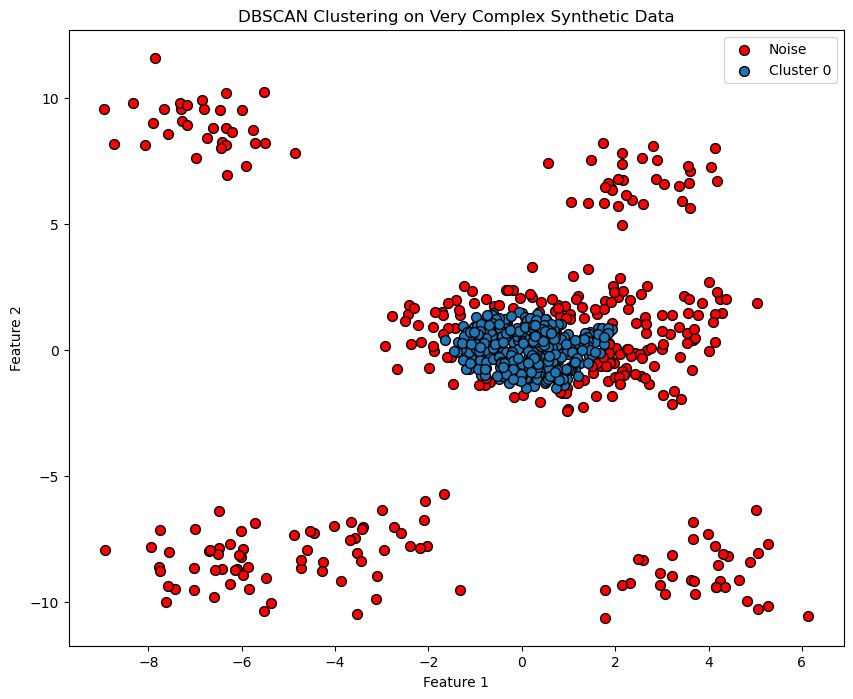

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import DBSCAN

random_state = 242

# Generate complex synthetic dataset
X1, _ = make_moons(n_samples=300, noise=1.0, random_state=random_state)
X2, _ = make_circles(n_samples=200, factor=0.8, noise=0.3, random_state=random_state)
X3, _ = make_blobs(n_samples=200, centers=6, cluster_std=1.0, random_state=random_state)

# Combine datasets
X_complex = np.vstack([X1, X2, X3])

# Apply DBSCAN to the complex dataset
dbscan = DBSCAN(eps=0.3, min_samples=10)
labels = dbscan.fit_predict(X_complex)

# Plot the results
plt.figure(figsize=(10, 8))
unique_labels = np.unique(labels)

for label in unique_labels:
    mask = labels == label
    if label == -1:  # Noise
        plt.scatter(X_complex[mask, 0], X_complex[mask, 1], c='red', label='Noise', edgecolor='k', s=50)
    else:
        plt.scatter(X_complex[mask, 0], X_complex[mask, 1], label=f'Cluster {label}', edgecolor='k', s=50)

plt.title("DBSCAN Clustering on Very Complex Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [14]:
%matplotlib notebook

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.animation as animation

# Generate blobs dataset
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Apply DBSCAN to the blobs dataset
dbscan = DBSCAN(eps=0.5, min_samples=10)
labels = dbscan.fit_predict(X)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot initialization
scatter = ax.scatter([], [], c=[], cmap="viridis", edgecolor="k", s=50)
ax.set_xlim(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1)
ax.set_ylim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
ax.set_title("DBSCAN Clustering on Blobs Dataset")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

# Update function for animation
def update(frame):
    ax.clear()
    ax.set_xlim(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1)
    ax.set_ylim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
    ax.set_title("DBSCAN Clustering on Blobs Dataset")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

    # Simulate clustering process by drawing partial results at each frame
    current_labels = np.copy(labels)
    current_labels[:frame] = -1  # Mark some points as noise
    for label in np.unique(current_labels):
        mask = current_labels == label
        if label == -1:  # Noise
            ax.scatter(X[mask, 0], X[mask, 1], c='red', label='Noise', edgecolor='k', s=50)
        else:
            ax.scatter(X[mask, 0], X[mask, 1], label=f'Cluster {label}', edgecolor='k', s=50)
    return scatter,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(0, len(X) + 1, 10), interval=100, repeat=False)

plt.show()

<IPython.core.display.Javascript object>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.animation as animation
from sklearn.datasets import make_blobs

seed = 42
centroids = 7
# Generate blobs dataset
X, _ = make_blobs(n_samples=500, centers=centroids, cluster_std=0.5, random_state=seed)

# Apply KMeans to the blobs dataset
kmeans = KMeans(n_clusters=centroids, init='random', n_init=1, random_state=seed)
kmeans.fit(X)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot initialization
ax.set_xlim(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1)
ax.set_ylim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
ax.set_title("KMeans Clustering on Blobs Dataset")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

# Create a scatter plot for each frame
def update(frame):
    ax.clear()
    ax.set_xlim(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1)
    ax.set_ylim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
    ax.set_title("KMeans Clustering on Blobs Dataset")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

    # Fit KMeans with incremental iterations
    kmeans.max_iter = frame
    kmeans.fit(X)

    # Plot the data points with assigned clusters
    labels = kmeans.labels_
    for label in np.unique(labels):
        ax.scatter(X[labels == label, 0], X[labels == label, 1], label=f'Cluster {label}', edgecolor='k', s=50)

    # Plot the cluster centers
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label="Centroids")

    return []

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(1, 10), interval=500, repeat=False)
ani.save('kmeans_clustering.gif', writer='pillow', fps=1)

plt.show()

C:\Users\keret\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<IPython.core.display.Javascript object>

C:\Users\keret\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\keret\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\keret\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\keret\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_